### Author: Harivansh Luchmun

# Linear Model



## I will read in a datasest, display the data, create and train a linear model on the data, and evaluate its performance


# Imports

In [71]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Grabbing the dataset

In [2]:


diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

# Understanding the data

In [3]:
# Description of our data
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [4]:
# These are the corresponding feature names with our columns
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
# Looking at how many samples we have 
diabetes.data.shape

(442, 10)

In [6]:
# Making sure our predicted values are of the same sample length
diabetes.target.shape

(442,)

In [7]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


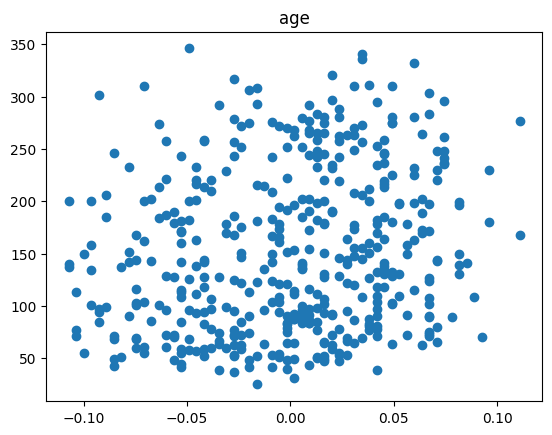

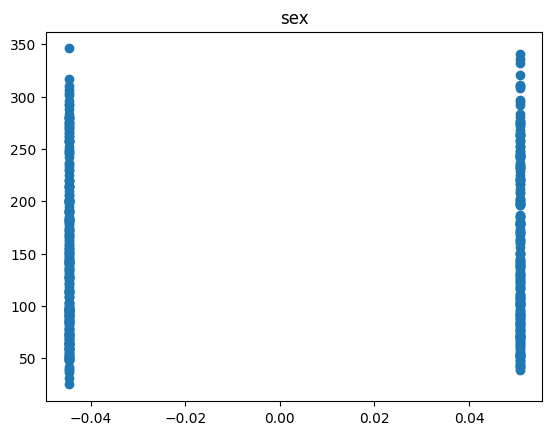

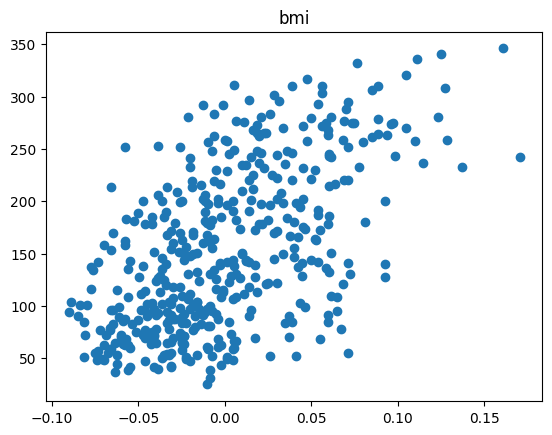

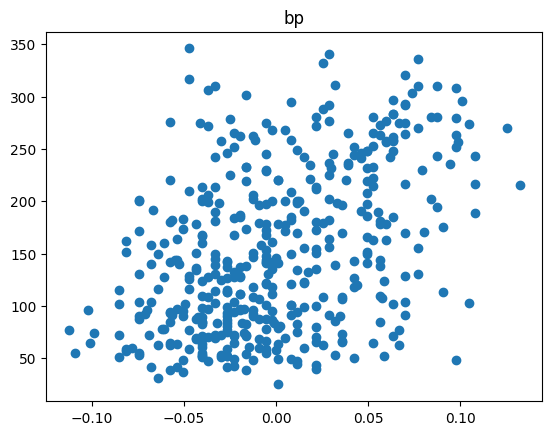

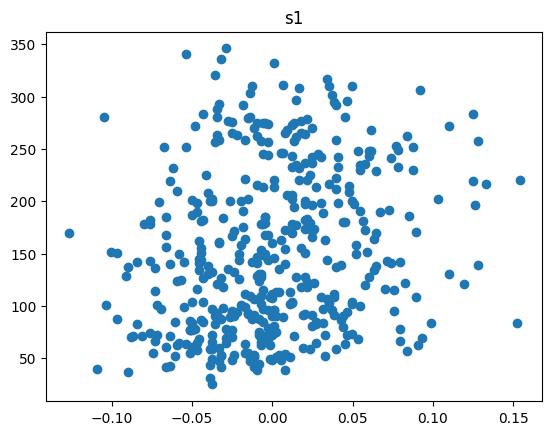

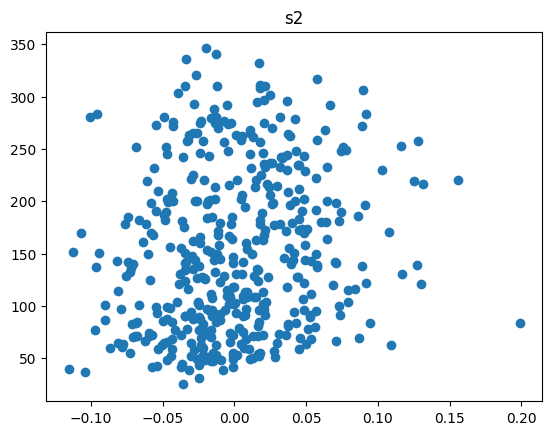

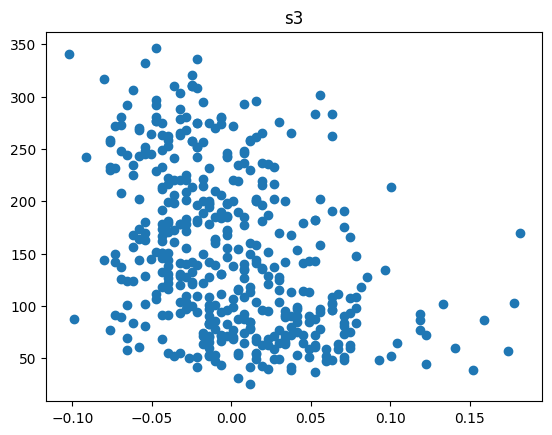

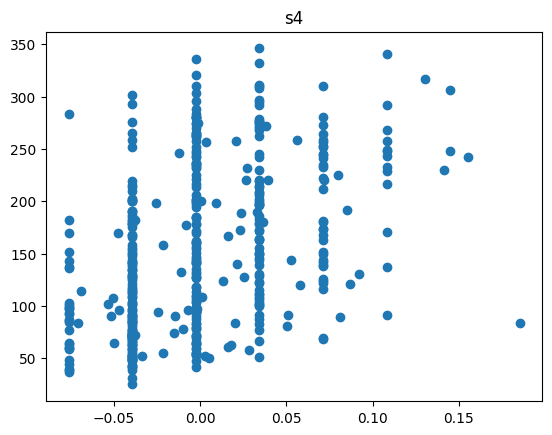

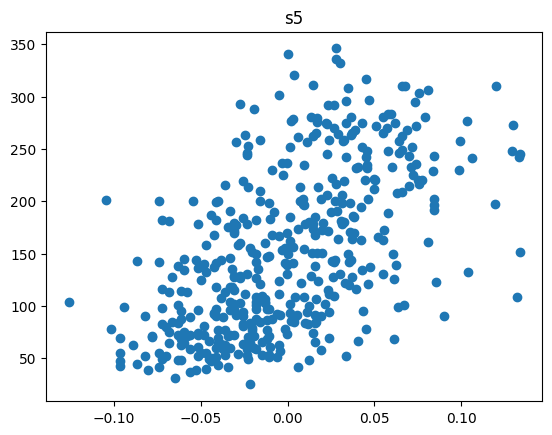

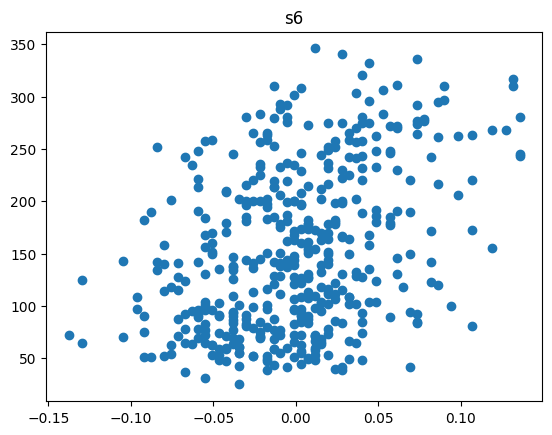

In [8]:
for name in diabetes.feature_names:
    plt.scatter(df[name], diabetes.target)
    plt.title(name)
    plt.show()

In [9]:
## From the plots above we can see that bmi, bp, s5, and s6 seem to have a linear correlation with predicting diabetes
## I thought that age would be a factor but there seems to be no linear relationship, there may be other manifolds present

# Training our Model

In [10]:
# First well begin with making the data to train on
# I want to choose bmi, bp, s5, s6 for the second model but we will use all of them for the first one
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
df_model_2 = df[['bmi', 'bp', 's5', 's6']]
df_model_2

,bmi,bp,s5,s6
0,0.061696,0.021872,0.019907,-0.017646
1,-0.051474,-0.026328,-0.068332,-0.092204
2,0.044451,-0.005670,0.002861,-0.025930
3,-0.011595,-0.036656,0.022688,-0.009362
4,-0.036385,0.021872,-0.031988,-0.046641
...,...,...,...,...
437,0.019662,0.059744,0.031193,0.007207
438,-0.015906,-0.067642,-0.018114,0.044485
439,-0.015906,0.017293,-0.046883,0.015491
440,0.039062,0.001215,0.044529,-0.025930


In [54]:
# Now we need to make our training and testing sets
# We will use train_test_split to get our data split using the first df
X = df
y = diabetes.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state =42)

In [55]:
Xtrain.shape

(353, 10)

In [56]:
Xtest.shape

(89, 10)

In [60]:
# We can now create our first model

lin1 = LinearRegression()
lin1.fit(Xtrain, ytrain)

LinearRegression()

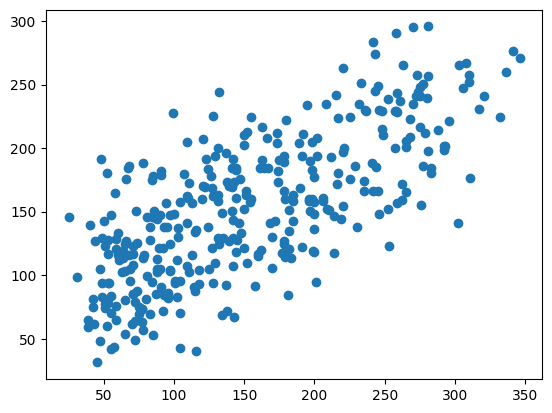

In [61]:
# Visualizing the predictions on the training data
train_pred = lin1.predict(Xtrain)
plt.scatter(ytrain, train_pred)


In [62]:
# We can see a positive correlation here with the the predicitons
# Lets see how well they perform
lin1.score(Xtrain, ytrain)

0.5279193863361498

In [67]:
# This is an ok correlation score

In [110]:
test_pred = lin1.predict(Xtest)
plt.scatter(ytest, test_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age
- s1
- s2
- s3
- s4
- ...


In [74]:
#lin1.score(Xtest, ytest)

In [81]:
score = r2_score(ytest, test_pred)
mse = mean_squared_error(ytest, test_pred)
rmse = np.sqrt(mse)
print("Full df test score: ", score)
print("Full df test mse: ", mse)
print("Full df test rmse: ", rmse)
print("rmse proportion: ", rmse/np.max(y))

Full df test score:  0.4526027629719195
Full df test mse:  2900.1936284934814
Full df test rmse:  53.85344583676593
rmse proportion:  0.15564579721608648


# First model analysis

## We can see that the accuracy score is not that high, meaning that our model is a poor fit for the data

## We have 15 % as the rmse proportion which is pretty large in my opinion and I would want to reduce it


In [98]:
# Lets try a model with the features I chose earlier
X = df_model_2
y = diabetes.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state =42)
lin2 = LinearRegression()
lin2.fit(Xtrain, ytrain)

LinearRegression()

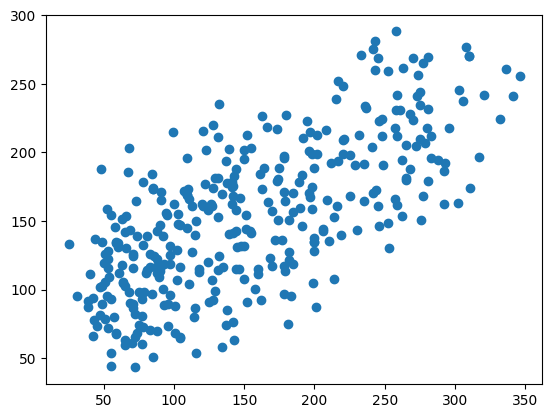

In [99]:
plt.scatter(ytrain, lin2.predict(Xtrain))

In [100]:
lin2.score(Xtrain, ytrain)

0.4837311985740538

In [95]:
# Also not a very good score on the training data so we can expect worse on the testing data

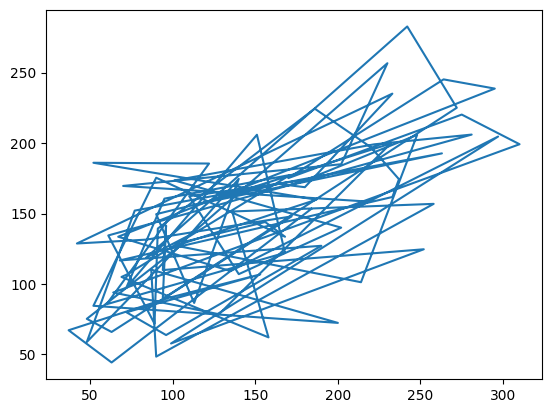

In [111]:
test_pred = lin2.predict(Xtest)
plt.scatter(ytest, test_pred)

In [106]:
lin2.score(Xtest, ytest)

0.4541018665654435

In [107]:
# This is also not a good score but not far off from the training score as I expected
# Regardless, lets check its performance

In [109]:
score = r2_score(ytest, test_pred)
mse = mean_squared_error(ytest, test_pred)
rmse = np.sqrt(mse)
print("Chosen df test score: ", score)
print("Chosen df test mse: ", mse)
print("Chosen df test rmse: ", rmse)
print("rmse proportion: ", rmse/np.max(y))

Chosen df test score:  0.4541018665654435
Chosen df test mse:  2892.2511501682443
Chosen df test rmse:  53.779653682115175
rmse proportion:  0.15543252509281844


# Second model analysis

## We can see that the accuracy score is not that high for my chosen df, meaning that our model is a poor fit for this data as well

## We have about 15 % as the rmse proportion, which is the same as the last one

## It seems the features I chose did not seem to enchance performance. I may have underfit the data by not including features that could have improved performance.




# Conclusion

## Model Performance

### The models did not perform very well. This could be due to a number of factors, but the ones I believe are the issue is not selecting the right features, underfitting the data, maybe not enough samples, or perhaps just that other models may be better and there is more than just a linear relationship at hand between the features 